## Data Description:   
##### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns  were based on phone calls. Often, more than one contact of the same client was required, in order to access if the product  (bank term deposit) would be ('yes') or not ('no') subscribed.   

## Domain:   
##### Banking  

## Context:  
##### Leveraging customer information is paramount for most  businesses. In the case of a bank, attributes of customers like  the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.  

## Attribute Information: 

* age (numeric)
* job : type of job (categorical:  'admin','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
* marital : marital status (categorical:  'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
* education
(categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 
* default: has credit in default? (categorical:  'no','yes','unknown')  
* balance: average yearly balance, in euros (numeric)  
* housing: has housing loan? (categorical:  'no','yes','unknown')  
* loan: has personal loan? (categorical: 'no','yes','unknown')  
* contact: contact communication type (categorical:  'cellular','telephone','unknown')  
* day: last contact day of the month (numeric 1 -31)  
* month: last contact month of year (categorical: 'jan', 'feb',  'mar', ..., 'nov', 'dec')  
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric;  999 means client was not previously contacted)  
* previous: number of contacts performed before this campaign and for this client (numeric)  
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
* target: has the client subscribed a term deposit? (binary: "yes","no") 

## Learning Outcomes:  
* Exploratory Data Analysis  
* Preparing the data to train a model  
* Training and making predictions using an Ensemble  Model  
* Tuning an Ensemble model    

## Objective  
##### The classification goal is to predict if the client will subscribe  (yes/no) a term deposit (variable y).  

## 1) Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr #pearsonr - The pearson correlation coefficient measures the relationship between 2 dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler #For scaling the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC #Support Vector Classifier

#Ensemble techniques
from sklearn.tree import DecisionTreeClassifier #DT does not take strings as input for the model fit step
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import export_graphviz #for exporting data in DOT format-DOT is the text file format of GraphViz
                                         #It has a human-readable syntax that describes network data including subgrphs and
                                         #element appearances (Colour , width , label)

from io import StringIO #The io module provides Python’s main facilities for dealing with various types of I/O

import pydotplus #first install pydotplus - pip install pydotplus
#PyDotPlus is an improved version of the old pydot project that provides a Python Interface to Graphviz’s Dot language

import graphviz #first install graphviz - pip install graphviz
from IPython.display import Image #for including image
from statistics import mean,median
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
from sklearn.metrics import precision_score,classification_report,roc_auc_score

## 2) Importing the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\ultra_instinct\lets upgrade AI-ML\Projects\Project 1 - Ensemble Learning\bank-full - Govindaraj V.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## 3) Exploratory Data Analysis

### Shape of data

In [4]:
print("\033[1m""The number of rows in dataframe :",df.shape[0])
print("\033[1m""The number of columns in dataframe :",df.shape[1])

The number of rows in dataframe : 45211
The number of columns in dataframe : 17


### Datatype of each attribute

In [5]:
df.dtypes.to_frame("Datatype of attributes").T #T is for taking transpose

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatype of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


* 10 features have object datatype and 7 features have int datatype
* As we can look in the above dataset 10 features are categorical hence lets convert them into int datatype

In [6]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].astype('category')
df.dtypes.to_frame('Datatype of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatype of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


* After conversion 10 features are catrgorical and 7 are int

### Checking for missing values

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
# A more presentable form
df.isnull().sum().to_frame("Missing values in dataframe").T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Missing values in dataframe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* The dataset has no missing values

### Looking at the columns of dataset

In [9]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [13]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

### A short summary

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


* min age is 18 and max age is 95
* min balance is -8019 and max balance is 102127
* age , balance , pdays contain outliers(found just by looking at data,more columns might have outlier when boxplot is plotted)

### Distribution of numerical columns

C:\Users\ultra_instinct\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ultra_instinct\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-15-1327d0ba68ef>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() #Displaying the plots


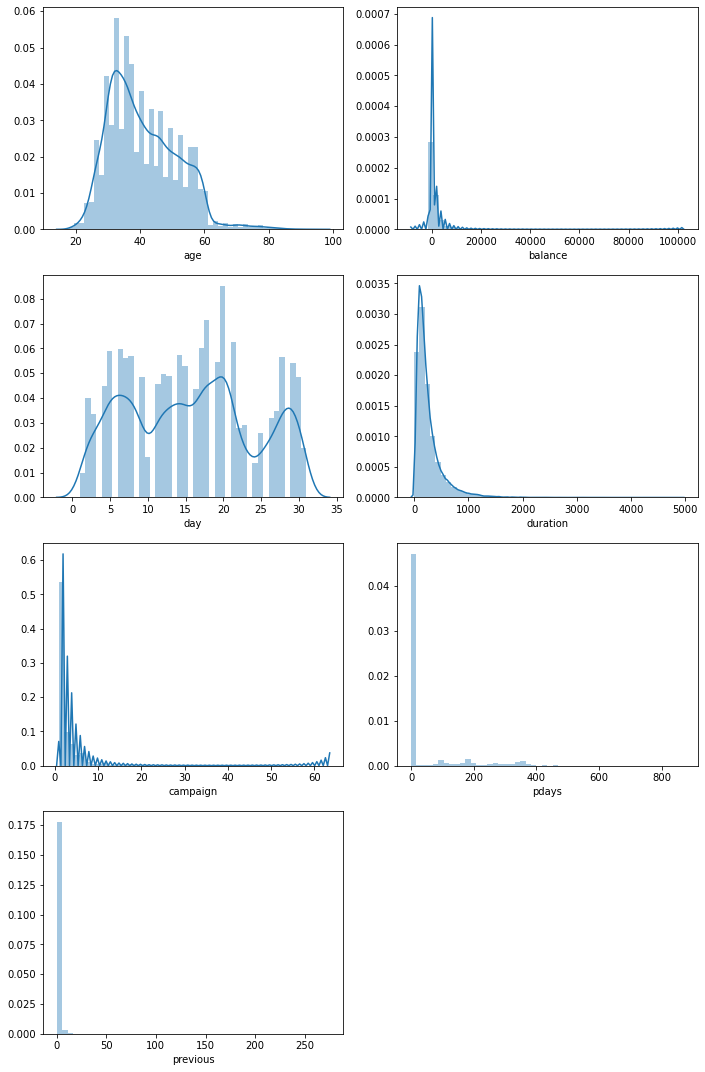

In [15]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(df['age'],ax=axe[0])
sns.distplot(df['balance'],ax=axe[1])
sns.distplot(df['day'],ax=axe[2])
sns.distplot(df['duration'],ax=axe[3])
sns.distplot(df['campaign'],ax=axe[4])
sns.distplot(df['pdays'],ax=axe[5])
sns.distplot(df['previous'],ax=axe[6])
fig.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
fig.show() #Displaying the plots
axe.flat[-1].set_visible(False) #Removing the empty subplots

### Conclusion after looking at the graphs
* age is somewhat normally distributed
* balance , duration , campaign , pdays and previous are right skewed

### Distribution of categorical columns

<ipython-input-16-027aa2cedfcd>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


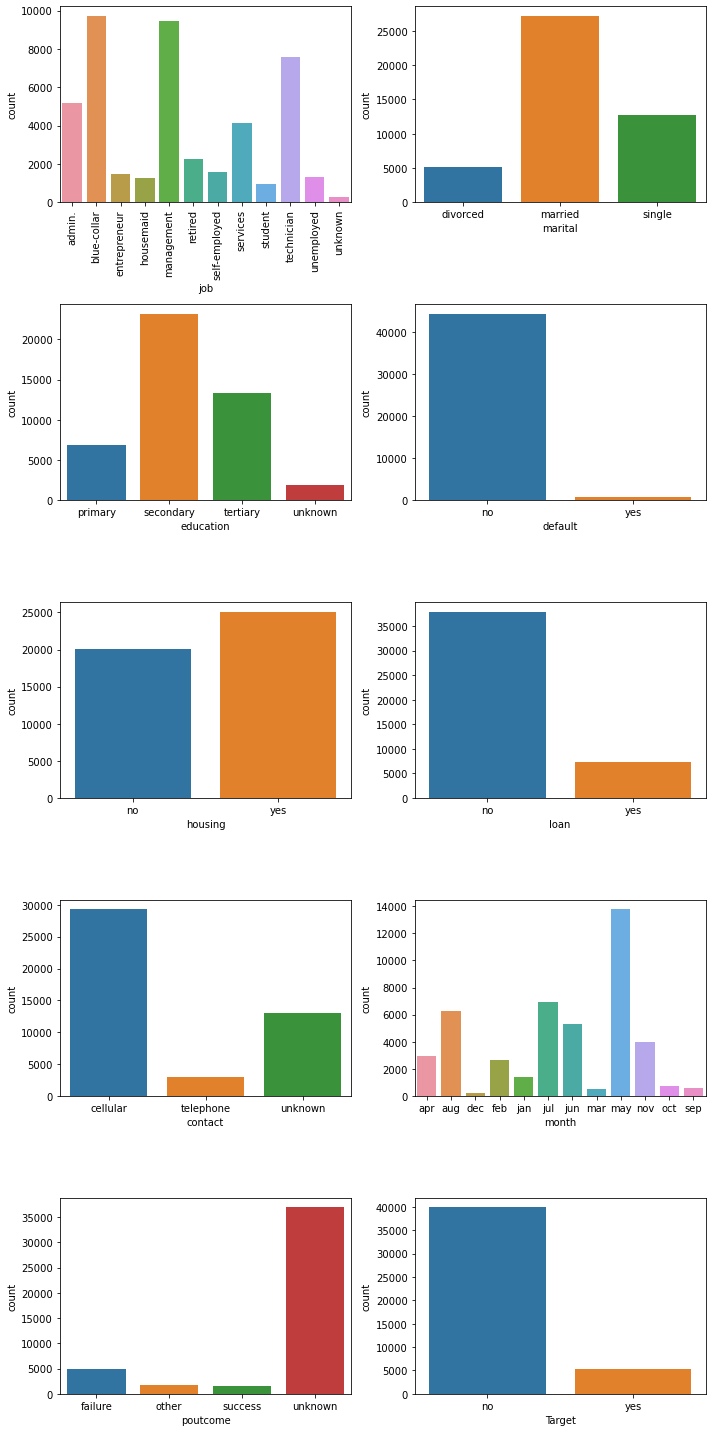

In [16]:
fig,axe=plt.subplots(nrows=5,ncols=2,figsize=(10,20))
axe=axe.flatten()
plot=sns.countplot(x=df['job'],data=df,ax=axe[0]) #for using plot.get_xticklabels we need to store the countplot in plot
plt.setp(plot.get_xticklabels(), rotation=90) #for rotating the text on x-axis by 90 degrees,this method is generally used
                                              #when you want to rotate xticks of only 1 plot out of multiple plots
sns.countplot(x=df['marital'],data=df,ax=axe[1])
sns.countplot(x=df['education'],data=df,ax=axe[2])
sns.countplot(x=df['default'],data=df,ax=axe[3])
sns.countplot(x=df['housing'],data=df,ax=axe[4])
sns.countplot(x=df['loan'],data=df,ax=axe[5])
sns.countplot(x=df['contact'],data=df,ax=axe[6])
sns.countplot(x=df['month'],data=df,ax=axe[7])
sns.countplot(x=df['poutcome'],data=df,ax=axe[8])
sns.countplot(x=df['Target'],data=df,ax=axe[9])
fig.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
fig.show()

### Understanding from distributions
* Around 90% customers have no default credit card
* Most customers have been contacted  in the month of may
* Most customers have been contacted through cellular network
* Outcome of the previous campaigns have been unknown mostly
* Most of the customers have a personal loan

### Measure of skewness of numerical columns

In [17]:
df.skew().to_frame("Measure of skewness").T #measuring the skewness

,age,balance,day,duration,campaign,pdays,previous
Measure of skewness,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


### Checking the presence of outliers

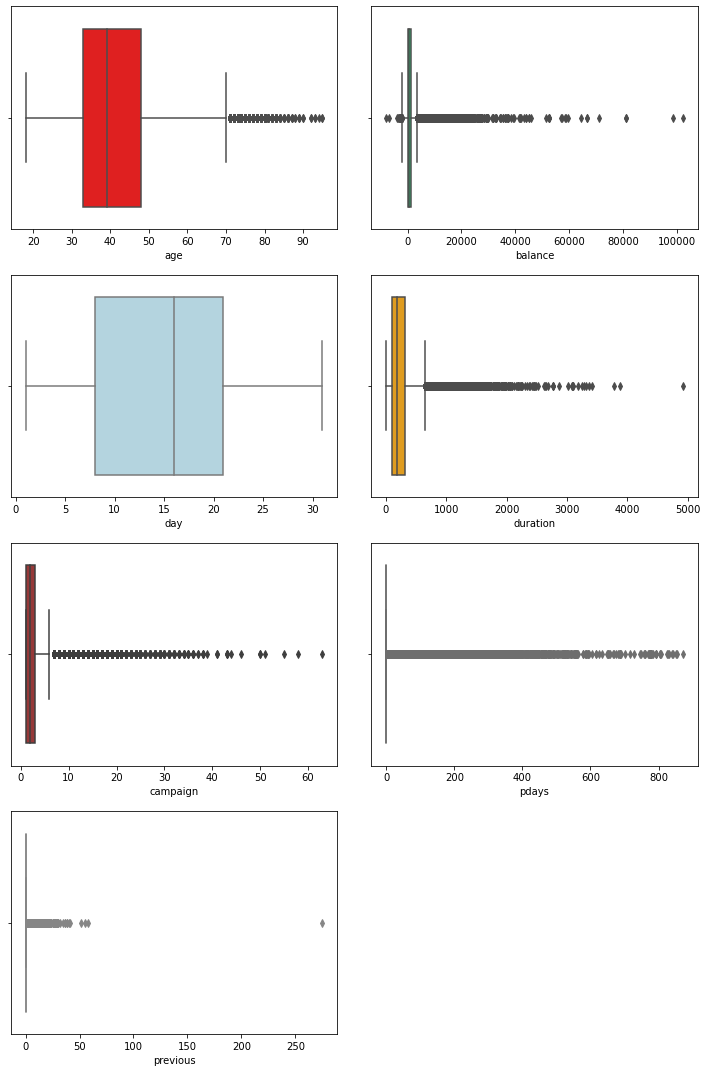

In [18]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(x='age',data=df,color='red',ax=axe[0])
sns.boxplot(x='balance',data=df,color='springgreen',ax=axe[1])
sns.boxplot(x='day',data=df,color='lightblue',ax=axe[2])
sns.boxplot(x='duration',data=df,color='orange',ax=axe[3])
sns.boxplot(x='campaign',data=df,color='brown',ax=axe[4])
sns.boxplot(x='pdays',data=df,color='violet',ax=axe[5])
sns.boxplot(x='previous',data=df,color='pink',ax=axe[6])
fig.tight_layout()
axe.flat[-1].set_visible(False)

### Understanding from boxplot
* Proves the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns
* Values less than 0 are present in 'balance' column

## 4) Data Preprocessing

### Label encoding of variables

 Before we go to the label encoding part there is one thing which I would like to do . Lets make a copy of the current dataframe , on one data we will perform the label encoding and other will remain as it is . This helps in creating a backup of sorts so that if there is some mistake we can refer to our original data !!

In [19]:
df_2=df.copy()
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
encoder=LabelEncoder()
df_2['default'] = encoder.fit_transform(df_2['default']).astype(int)
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int) #encoding 'marital' column and assigning 1 married, 2 divorced and 3 single 
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int) #encoding 'loan' column and assigning 0 no and 1 yes values
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int) #encoding 'housing' column and assigning 0 no and 1 yes values
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int) #encoding 'target' column and assigning 0 no and 1 yes values
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


### Handling the outliers with mean

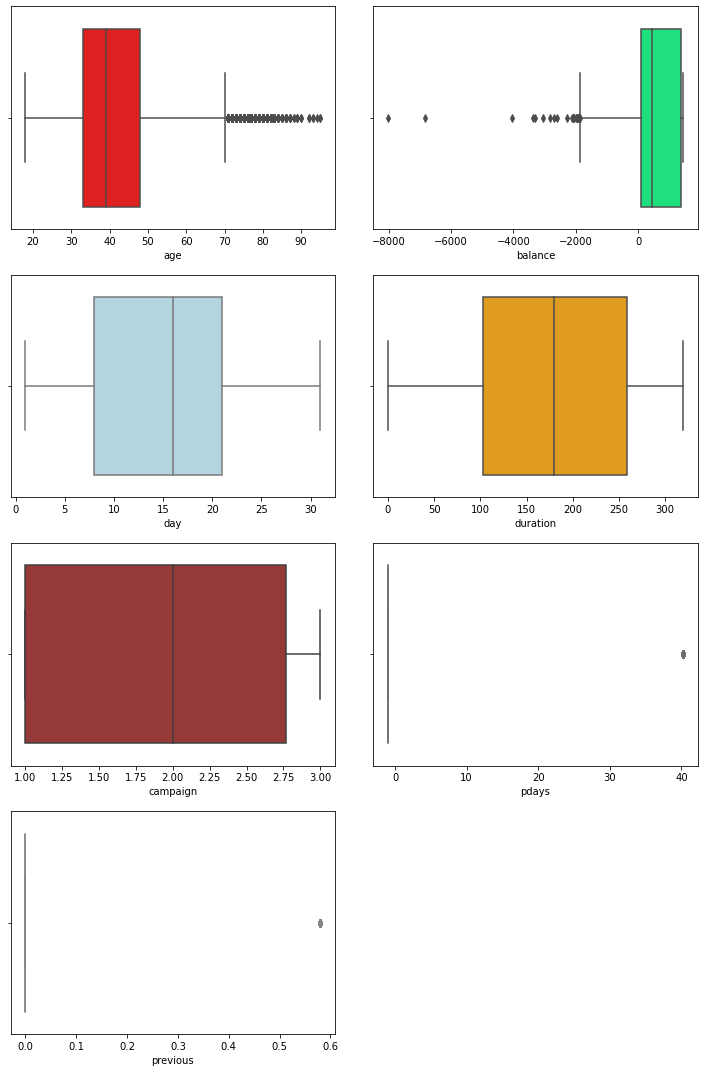

In [22]:
meanbal=float(np.mean(df_2['balance']))
df_2['balance']=np.where((df_2['balance']>np.percentile(df_2['balance'],75)),meanbal,df_2['balance'])

meandur=float(np.mean(df_2['duration']))
df_2['duration']=np.where((df_2['duration']>np.percentile(df_2['duration'],75)),meandur,df_2['duration'])

meancam=float(np.mean(df_2['campaign']))
df_2['campaign']=np.where((df_2['campaign']>np.percentile(df_2['campaign'],75)),meancam,df_2['campaign'])

meanpd=float(np.mean(df_2['pdays']))
df_2['pdays']=np.where((df_2['pdays']>np.percentile(df['pdays'],75)),meanpd,df['pdays'])

meanpr=float(np.mean(df['previous']))
df_2['previous']=np.where((df_2['previous']>np.percentile(df['previous'],75)),meanpr,df['previous'])


fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(df['age'],color='red',ax=axe[0])
sns.boxplot(x='balance',data=df_2,color='springgreen',ax=axe[1])
sns.boxplot(x='day',data=df_2,color='lightblue',ax=axe[2])
sns.boxplot(x='duration',data=df_2,color='orange',ax=axe[3])
sns.boxplot(x='campaign',data=df_2,color='brown',ax=axe[4])
sns.boxplot(x='pdays',data=df_2,color='violet',ax=axe[5])
sns.boxplot(x='previous',data=df_2,color='pink',ax=axe[6])
fig.tight_layout()
axe.flat[-1].set_visible(False)

### Understanding from boxplot
* Outliers in 'age' column are not handled because it is a specific value for each record.
* After handeling Outliers in 'balance', the number of outliers on the lower side is increased.

### Corr plot of all features

In [23]:
df_2.corr()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.403240,-0.106807,-0.017879,0.109252,-0.185513,-0.015655,-0.009120,-0.042357,-0.016518,0.022214,0.000753,0.000753,0.007367,0.025155
marital,-0.403240,1.000000,0.108576,-0.007023,0.019582,-0.016096,-0.046893,-0.005261,-0.006991,0.015351,-0.027077,0.024952,0.024952,-0.016850,0.045588
education,-0.106807,0.108576,1.000000,-0.010718,0.065631,-0.090790,-0.048574,0.022671,-0.057304,-0.003828,-0.006755,0.032889,0.032889,-0.019361,0.066241
default,-0.017879,-0.007023,-0.010718,1.000000,-0.172977,-0.006025,0.077234,0.009424,0.011486,-0.005915,0.012028,-0.039519,-0.039519,0.034898,-0.022419
balance,0.109252,0.019582,0.065631,-0.172977,1.000000,-0.075572,-0.130729,0.000260,0.001538,0.033961,-0.025583,0.075741,0.075741,-0.057929,0.096921
housing,-0.185513,-0.016096,-0.090790,-0.006025,-0.075572,1.000000,0.041323,-0.027982,0.271481,0.005151,-0.031448,0.063650,0.063650,-0.099971,-0.139173
loan,-0.015655,-0.046893,-0.048574,0.077234,-0.130729,0.041323,1.000000,0.011370,0.022145,-0.010072,0.000965,-0.031212,-0.031212,0.015458,-0.068185
day,-0.009120,-0.005261,0.022671,0.009424,0.000260,-0.027982,0.011370,1.000000,-0.006028,-0.064636,0.120661,-0.086174,-0.086174,0.083460,-0.028348
month,-0.042357,-0.006991,-0.057304,0.011486,0.001538,0.271481,0.022145,-0.006028,1.000000,0.012875,-0.126055,0.031709,0.031709,-0.033038,-0.024471
duration,-0.016518,0.015351,-0.003828,-0.005915,0.033961,0.005151,-0.010072,-0.064636,0.012875,1.000000,-0.090286,0.038927,0.038927,-0.014984,0.278978


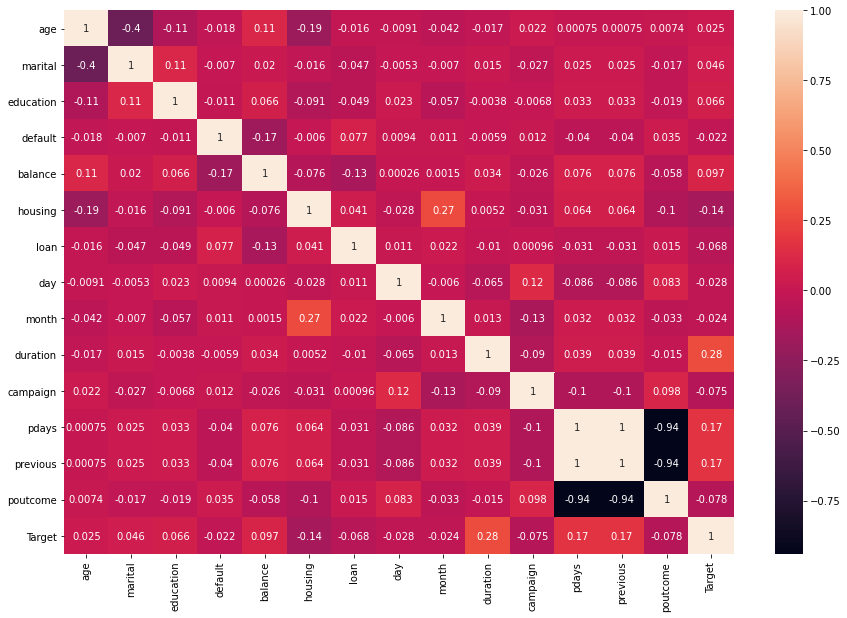

In [24]:
# A more presentable form to represent correlation between data is to use heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_2.corr(),annot=True)

### Understanding from above corr plot
* 'pdays' and 'previous' are highly correlated

### Removing columns
* 'job','education' and 'contact' attributes contain multiple unknown values
* As they are specific string values and not numbers , hence they cannot be treated with mean and median replacement
* As per data description , duration is removed to have a realastic prediction
* 'day' and 'month' will not have any relationship with customer opting for subscription
* 'pdays' and 'previous' are higly correlated , hence removing any one of them
* Even though 'poutcome' contains huge number of missing values it is kept because 'poutcome' is the outcome of the previous campaign and hence can help in decision making , training and testing .

In [25]:
df_2=df_2.drop(['job','education','contact','day','month','duration','pdays'],axis=1)
df_2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


### Pairplot of all features

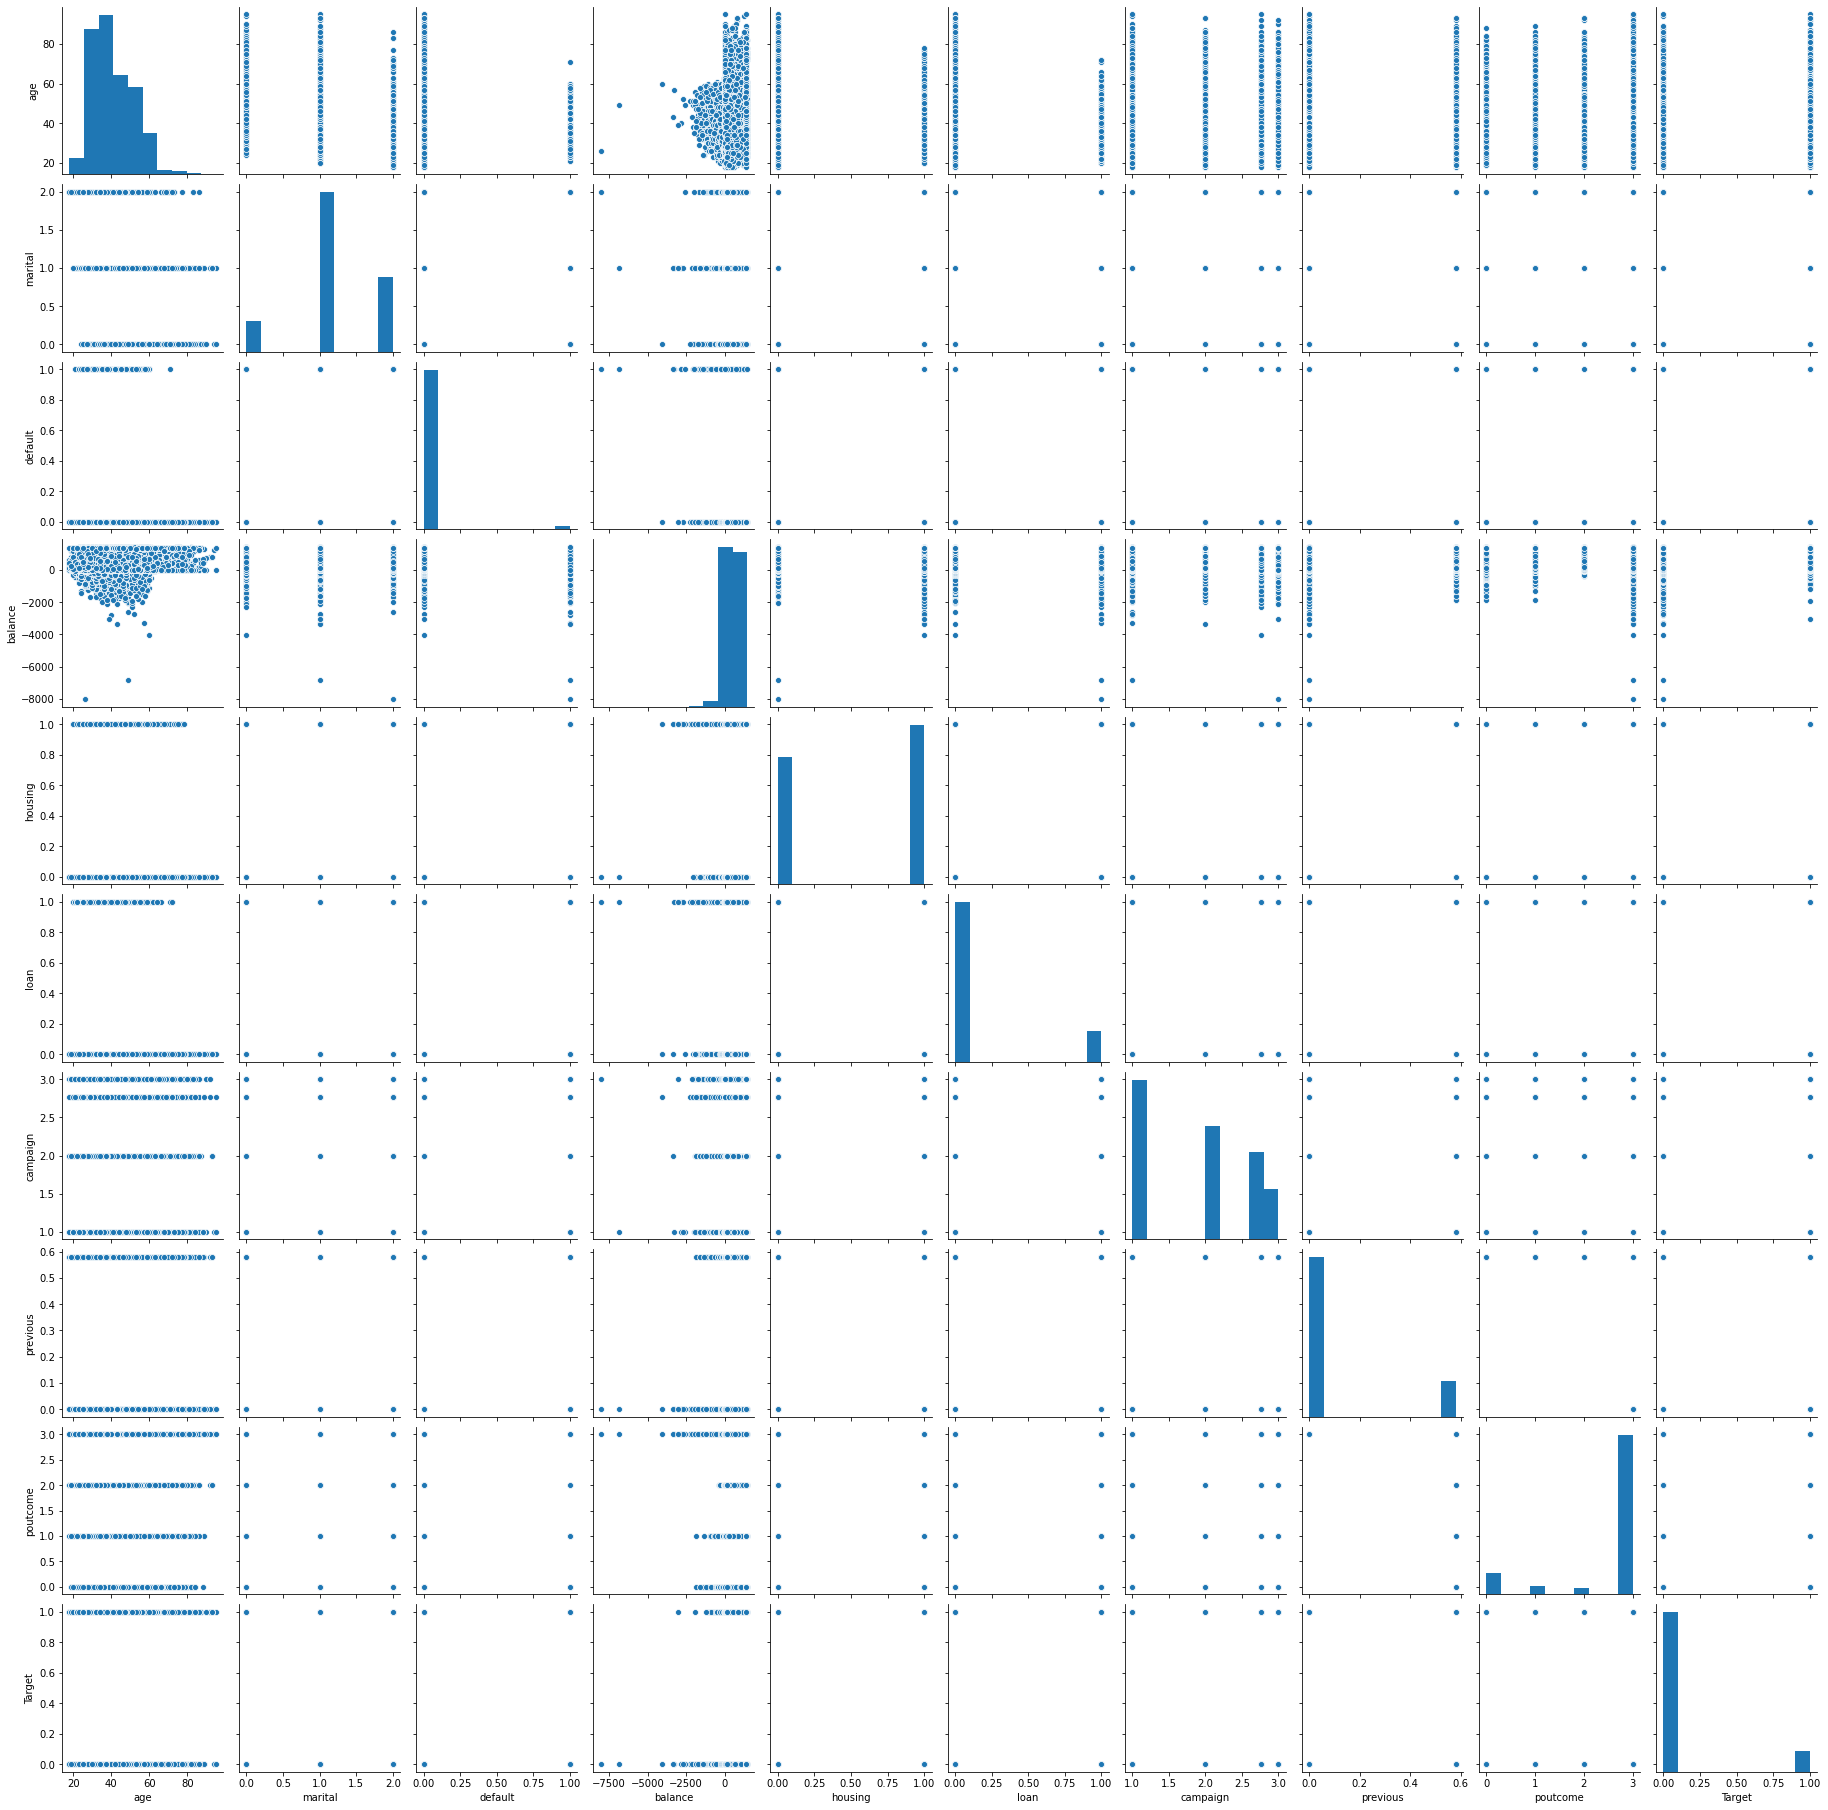

In [26]:
sns.pairplot(df_2)

## 5) Train , Test and Split

In [27]:
x=df_2.drop('Target',axis=1)
y=df_2['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## 6) Scaling values

In [28]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

## 7) Models

### Logistic Regression

In [29]:
logic_r=LogisticRegression(solver='liblinear') #LogisticRegression usually works best for binary classification , hence for
                                            #multiclassification it is good to use liblinear , also liblinear is recommended
                                            # for high dimensional datasets
logic_r.fit(x_train_scaled,y_train)
y_pred=logic_r.predict(x_test_scaled)

In [30]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,y_pred))
LR_accuracy=accuracy_score(y_test,y_pred)
print('\033[1m''-'*42)
print('\033[1m''Accuracy of Logistic Regression : ',round(LR_accuracy,2))
print('\033[1m''-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,y_pred))

Confusion matrix :
 [[11897   116]
 [ 1310   241]]
------------------------------------------
Accuracy of Logistic Regression :  0.89
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



### Naive Bayes

In [31]:
NB=GaussianNB()
NB.fit(x_train_scaled,y_train)
y_predi=NB.predict(x_test_scaled)

In [32]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,y_predi))
print('\033[1m''-'*42)
NB_accuracy=accuracy_score(y_test,y_predi)
print('\033[1m''Accuracy of Naive Bayes : ',round(NB_accuracy,2))
print('\033[1m''-'*42)
print('\033[1m''\nClassification report\n',classification_report(y_test,y_predi))

Confusion matrix :
 [[10745  1268]
 [ 1045   506]]
------------------------------------------
Accuracy of Naive Bayes :  0.83
------------------------------------------

Classification report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564



### K-Nearest Neighbor

In [33]:
#k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)
y_predict=knn.predict(x_test_scaled)

In [34]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,y_predict))
print('\033[1m''-'*42)
KNN_accuracy=accuracy_score(y_test,y_predict)
print('\033[1m''Accuracy of KNN : ',round(KNN_accuracy,2))
print('\033[1m''-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,y_predict))

Confusion matrix :
 [[11519   494]
 [ 1227   324]]
------------------------------------------
Accuracy of KNN :  0.87
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.40      0.21      0.27      1551

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.85      0.87      0.86     13564



### Finding the optimal k

Optimal k is :  39


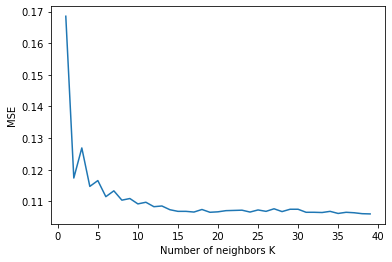

In [35]:
number_list=list(np.arange(1,40)) #arange - returns array of integers in specified range
accuracy_list=[] #Empty list to score accuracy scores of knn models based on various k values
for i in number_list:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    y_predicts=knn.predict(x_test_scaled)
    accuracy_s=accuracy_score(y_test,y_predicts)
    accuracy_list.append(accuracy_s)
    
MSE=[1-j for j in accuracy_list]
optimal=number_list[MSE.index(min(MSE))]
print("Optimal k is : ",optimal)

plt.plot(number_list,MSE)
plt.xlabel('Number of neighbors K')
plt.ylabel('MSE')
plt.show()

* The graph is almost constant after 14 or 15 , but since the main concern for us right now is not the accuracy of the model therefore we will go with k=3 , but if we want to increase accuracy we can also go with k=13 or whatever suits best !

### SVC

In [36]:
svc=SVC()
svc.fit(x_train_scaled,y_train)
svc_predcited=svc.predict(x_test_scaled)

In [37]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,svc_predcited))
print('-'*42)
svc_accuracy=accuracy_score(y_test,svc_predcited)
print('\033[1m''Accuracy os SVC : ',round(svc_accuracy,3))
print('-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,svc_predcited))

Confusion matrix :
 [[11867   146]
 [ 1273   278]]
------------------------------------------
Accuracy os SVC :  0.895
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564



## 8) Ensemble Models
*** A very important point here is that decision trees and other ensemble methods don't require the data to be scaled , hence in the fitting of the data we will use the original x_train,x_test rather than x_train_scaled,x_test_scaled.....also they are not sensitive to variance

### Decision Tree

In [38]:
dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(x_train,y_train)
predicted_DT=dTree.predict(x_test)

In [39]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,predicted_DT))
print('-'*42)
DT_accuracy=accuracy_score(y_test,predicted_DT)
print('\033[1m''Accuracy of Decision Tree : ',round(DT_accuracy,2))
print('-'*42)
print('\033[1m''Classification report :\n',classification_report(y_test,predicted_DT))

Confusion matrix :
 [[11020   993]
 [ 1190   361]]
------------------------------------------
Accuracy of Decision Tree :  0.84
------------------------------------------
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.84      0.83     13564



### Feature importance test for decision tree
* Among all the features which help in determining the output 'Target' , we will try to find out which features are playing the most important roles

In [40]:
xvar=df_2.drop('Target',axis=1)
feature_cols=xvar.columns
feat_importance=dTree.tree_.compute_feature_importances(normalize=False)

#Purpose of zip() is to map similar index of multiple containers so that they can be used just using as single entity
#Over here feature_cols is mapped to dTree.feature_importances_
feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) #dict=dictionary of columns and importance

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') 
#Creates DataFrame object from dictionary by columns or by index allowing dtype specification.
#Orient=index here means the keys of dictionary are rows for dataframe

feat_imp.sort_values(by=0,ascending=False)

,0
balance,0.442826
age,0.248702
poutcome,0.095115
campaign,0.086817
marital,0.040698
previous,0.034347
loan,0.025493
housing,0.022714
default,0.003286


### Pruning of decision tree
* Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.

In [41]:
#if max_depth is mot mentioned then default value is None
dTreeR=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTreeR.fit(x_train,y_train)
predicted_DTR=dTreeR.predict(x_test)

In [42]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,predicted_DTR))
print('-'*42)
DTR_accuracy=accuracy_score(y_test,predicted_DTR)
print('\033[1m''Accuracy of Decision Tree with Regularization : {:.2f}'.format(DTR_accuracy))
print('-'*42)
print('\033[1m''\nClassification Report :\n',classification_report(y_test,predicted_DTR))

Confusion matrix :
 [[11826   187]
 [ 1237   314]]
------------------------------------------
Accuracy of Decision Tree with Regularization : 0.90
------------------------------------------

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



* **Note - Graphviz is open source graph visualization software. Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks. It has important applications in networking, bioinformatics, software engineering, database and web design, machine learning, and in visual interfaces for other technical domains.**



In [43]:
feat_importance=dTreeR.tree_.compute_feature_importances(normalize=False)
feat_imp_dict=dict(zip(feature_cols,dTreeR.feature_importances_))
feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.sort_values(by=0,ascending=False)

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


### Bagging

In [44]:
bagc=BaggingClassifier(base_estimator=dTree,n_estimators=500,random_state=1)
bagc.fit(x_train,y_train)
predicted_BAG=bagc.predict(x_test)

In [45]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,predicted_BAG))
print('-'*42)
BAG_accuracy=accuracy_score(y_test,predicted_BAG)
print('\033[1m''Accuracy of Decision tree(with bagging implemented) : ',round(BAG_accuracy,2))
print('-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,predicted_BAG))

Confusion matrix :
 [[11613   400]
 [ 1222   329]]
------------------------------------------
Accuracy of Decision tree(with bagging implemented) :  0.88
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



### Adaptive Boosting
* Boosting -  A boosting algorithm combines multiple simple models (also known as weak learners or base estimators) to generate the final output.

In [46]:
#base_estimator: The model to the ensemble, the default is a decision tree.
adab=AdaBoostClassifier(n_estimators=50,random_state=1)
adab.fit(x_train,y_train)
predicted_ADA=adab.predict(x_test)

In [47]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,predicted_ADA))
print('-'*42)
ADA_accuracy=accuracy_score(y_test,predicted_ADA)
print('\033[1m''Accuracy of decision tree(with Adaboost implemented) : ',round(ADA_accuracy,2))
print('-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,predicted_ADA))

Confusion matrix :
 [[11884   129]
 [ 1309   242]]
------------------------------------------
Accuracy of decision tree(with Adaboost implemented) :  0.89
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



### Gradient Boosting

In [48]:
gdab=GradientBoostingClassifier(n_estimators=100,random_state=1)
gdab.fit(x_train,y_train)
predicted_GRAD=gdab.predict(x_test)

In [49]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,predicted_GRAD))
print('-'*42)
GRAD_accuracy=accuracy_score(y_test,predicted_GRAD)
print('\033[1m''Accuracy of Gradient Boosting : ',round(GRAD_accuracy,2))
print('-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,predicted_GRAD))

Confusion matrix :
 [[11889   124]
 [ 1305   246]]
------------------------------------------
Accuracy of Gradient Boosting :  0.89
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



### Random Forest

In [50]:
#n=100
randf=RandomForestClassifier(n_estimators=100,max_features=3,random_state=1)
#The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node
#n_estimators=no. of trees
randf.fit(x_train,y_train)
predicted_RAN=randf.predict(x_test)

In [51]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,predicted_RAN))
print('-'*42)
RAN_accuracy=accuracy_score(y_test,predicted_RAN)
print('\033[1m''Accuracy of Random Forest : ',round(RAN_accuracy,2))
print('-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,predicted_RAN))

Confusion matrix :
 [[11588   425]
 [ 1211   340]]
------------------------------------------
Accuracy of Random Forest :  0.88
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.44      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [52]:
#n=500
randf=RandomForestClassifier(n_estimators=500,random_state=1,max_features=5)
randf.fit(x_train,y_train)
predicted_RANN=randf.predict(x_test)

In [53]:
print('\033[1m''Confusion matrix :\n',confusion_matrix(y_test,predicted_RANN))
print('-'*42)
RANN_accuracy=accuracy_score(y_test,predicted_RANN)
print('\033[1m''Accuracy of Random Forest : ',round(RANN_accuracy,2))
print('-'*42)
print('\033[1m''\nClassification report :\n',classification_report(y_test,predicted_RANN))

Confusion matrix :
 [[11614   399]
 [ 1216   335]]
------------------------------------------
Accuracy of Random Forest :  0.88
------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.93     12013
           1       0.46      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## 9) Models with Accuracy Scores

In [56]:
Scores=[('Naive Bayes',NB_accuracy),
       ('KNN',KNN_accuracy),
       ('Logistic Regression',LR_accuracy),
       ('SVC',svc_accuracy),
       ('Decision Tree',DT_accuracy),
       ('Decision Tree with Regularization',DTR_accuracy),
       ('Bagging',BAG_accuracy),
       ('Adaptive Boosting',ADA_accuracy),
       ('Gradient Boosting',GRAD_accuracy),
       ('Random Forest N=100',RAN_accuracy),
       ('Random Forest N=500',RANN_accuracy)] #List of accuracy scores of all model

Scores=pd.DataFrame(Scores,columns=['Model','Accuracy Score']) #Conversion of list to dataframe
print('\033[1m''Current scores with outliers replaced by mean :')
Scores.sort_values(by='Accuracy Score',ascending=False)

Current scores with outliers replaced by mean :


,Model,Accuracy Score
3,SVC,0.895385
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
8,Gradient Boosting,0.894648
7,Adaptive Boosting,0.893984
10,Random Forest N=500,0.880935
6,Bagging,0.880419
9,Random Forest N=100,0.879387
1,KNN,0.873120
4,Decision Tree,0.839059


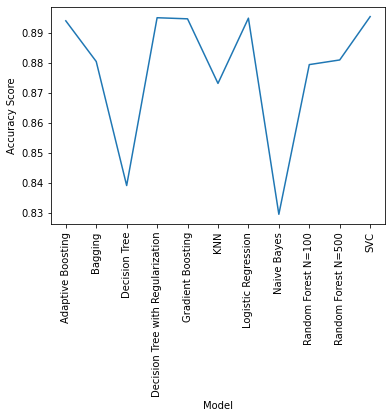

In [59]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy Score'],data=Scores,markers=True,dashes=False)
plt.xticks(rotation=90)
plt.show()

## 10) Conclusion
### Comments on Dataset
* The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models. 
* The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models. 
* Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

### Comments on Model
* There is not much difference between the accuracy scores of SVC and Decision tree with regularization
* SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
* In Decision Trees, Gradient boosting method always performed better for this dataset.